### Get the data

In [1]:
import pandas as pd 

housing = pd.read_csv('/work/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

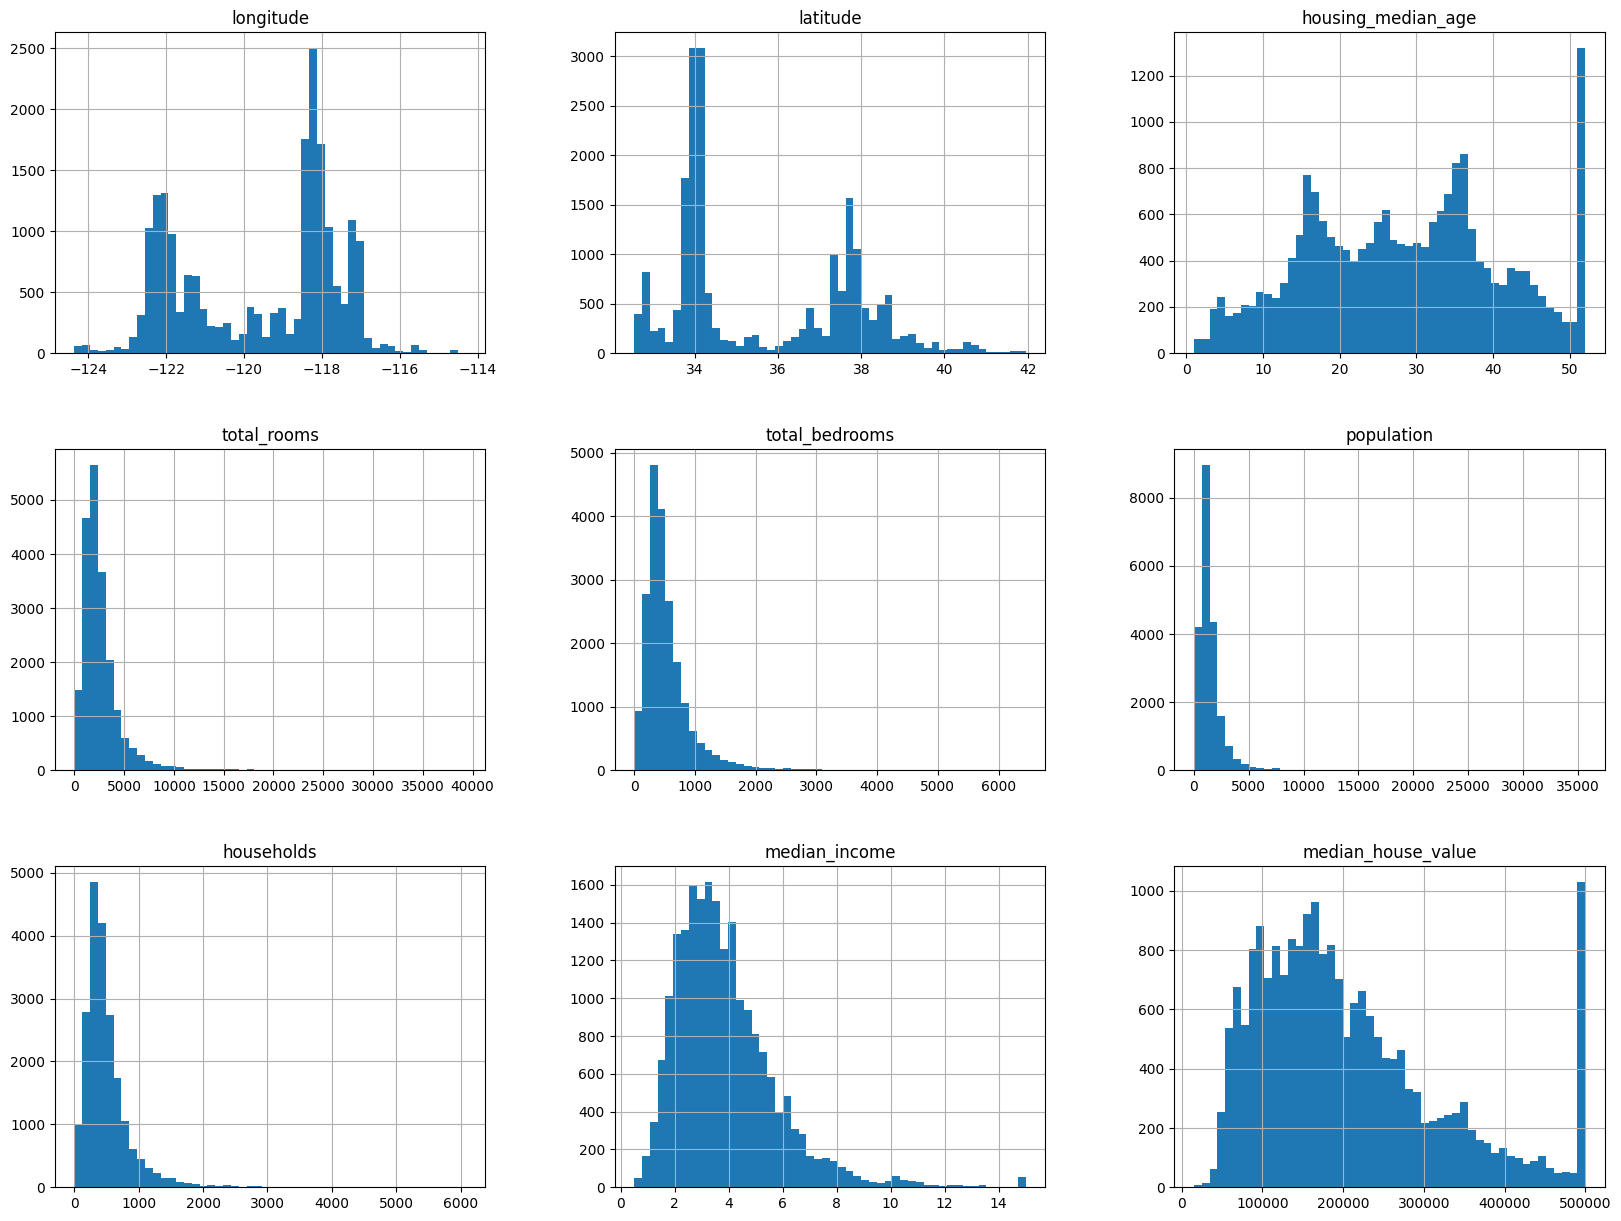

In [5]:
import matplotlib.pyplot as plt 
housing.hist(bins=50,figsize =(20,15))

Many histograms are tail heavy. They extend much farther to the right of the median than to the left. This may make it bit harder for some ML algorithms to detect patterns. https://www.statisticshowto.com/heavy-tailed-distribution/

In [6]:
# creating test set

import numpy as np 

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [7]:
train_set,test_set = split_train_test(housing,0.2)

In [8]:
print(len(train_set),  " + ", len(test_set))

16512  +  4128


In [9]:
y = housing.median_income
x = housing.drop('median_income',axis = 1)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,342200.0,NEAR BAY


In [10]:

!sudo pip install --upgrade pip --quiet
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [11]:
# using sckitlearn for splitting

from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(housing,test_size=0.2,random_state=40)
# X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state = 40, test_size =0.2)

<AxesSubplot: >

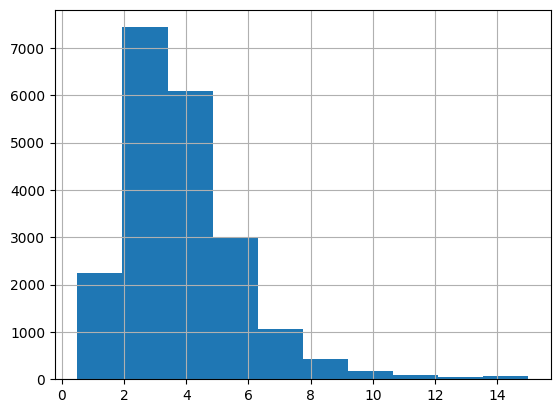

In [12]:
housing["median_income"].hist()

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [14]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot: >

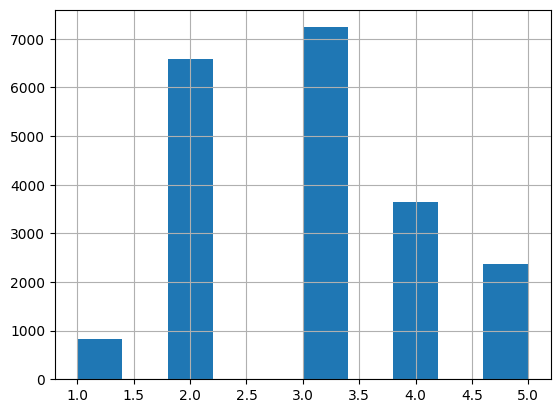

In [15]:
housing["income_cat"].hist()
#housing["median_income"].hist()

Stratified Sampling is important as it guarantees that your dataset does not have an intrinsic bias and that it does represent the population. Researchers rely on stratified sampling when a population’s characteristics are diverse and they want to ensure that every characteristic is properly represented in the sample. This helps with the generalizability and validity of the study, as well as avoiding research biases like undercoverage bias.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [16]:
# stratified sampling based on the income category beacuse of it's outliers

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [18]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [19]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=40)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [20]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.041667,4.622871,0.364964
2,0.318847,0.318798,0.313469,-1.686674,-0.015195
3,0.350581,0.350533,0.353198,0.746269,-0.013820
4,0.176308,0.176357,0.171996,-2.445727,0.027480
5,0.114438,0.114341,0.119671,4.572396,-0.084674


In [21]:
for set_ in(strat_train_set,strat_test_set):
    set_.drop("income_cat",axis = 1,inplace = True)

### Data Visualization

In [22]:
# creating copy of training set
housing = strat_test_set.copy()

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

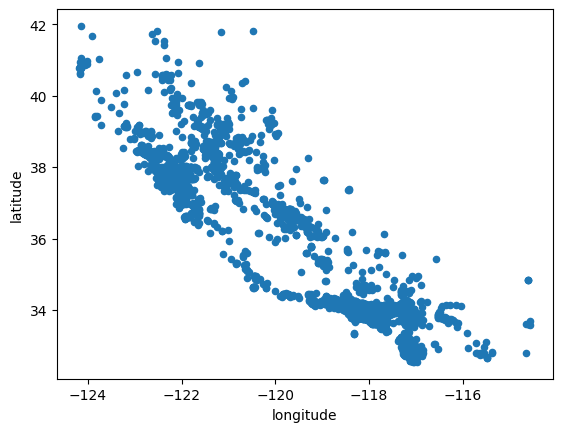

In [23]:
housing.plot(kind = "scatter",x="longitude",y="latitude")

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

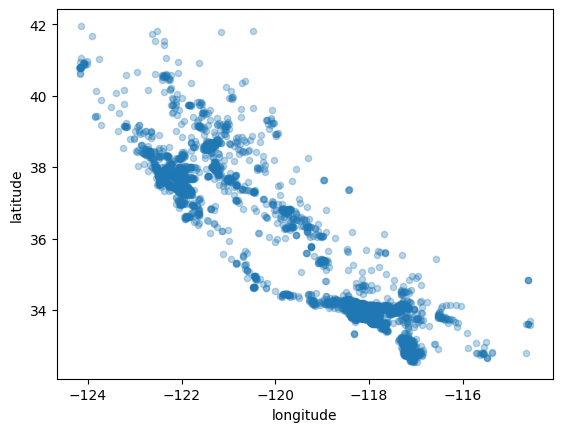

In [24]:
housing.plot(kind = "scatter",x="longitude",y="latitude",alpha=0.3)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

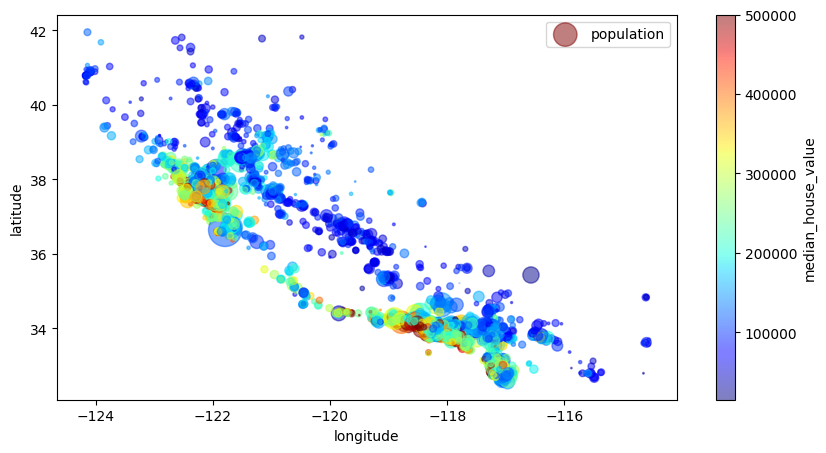

In [25]:
#scatter plot represnting population based on  their median house vale. 
#radius of circle i.e "s" is based on population density
#color of each circle i.e "c" is based on median house value


housing.plot.scatter(x="longitude",y="latitude",alpha=0.5,
                    s= housing["population"]/50,label = "population",figsize =(10,5),
                    c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)


above graph explains that housing prices depends on location and also on population density. Which are near to ocean they have high prices.

In [26]:
# correlation between features

corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925426,-0.117560,0.028628,0.043930,0.068887,0.026334,0.002910,-0.039848
latitude,-0.925426,1.000000,0.032850,-0.024331,-0.046573,-0.084358,-0.045920,-0.099023,-0.150336
housing_median_age,-0.117560,0.032850,1.000000,-0.350487,-0.304722,-0.287470,-0.290560,-0.150288,0.071210
total_rooms,0.028628,-0.024331,-0.350487,1.000000,0.933630,0.864091,0.918768,0.191623,0.131296
total_bedrooms,0.043930,-0.046573,-0.304722,0.933630,1.000000,0.882700,0.978303,-0.000252,0.057247
population,0.068887,-0.084358,-0.287470,0.864091,0.882700,1.000000,0.916104,0.014239,-0.016164
households,0.026334,-0.045920,-0.290560,0.918768,0.978303,0.916104,1.000000,0.021517,0.070947
median_income,0.002910,-0.099023,-0.150288,0.191623,-0.000252,0.014239,0.021517,1.000000,0.691867
median_house_value,-0.039848,-0.150336,0.071210,0.131296,0.057247,-0.016164,0.070947,0.691867,1.000000


In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

The correlation coefficient measure only linear correlation. It may completely miss out on nonlinear relationships.

And also in the above values for median house value we can see the median income has high positive correlation coefficient than compared to other.

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

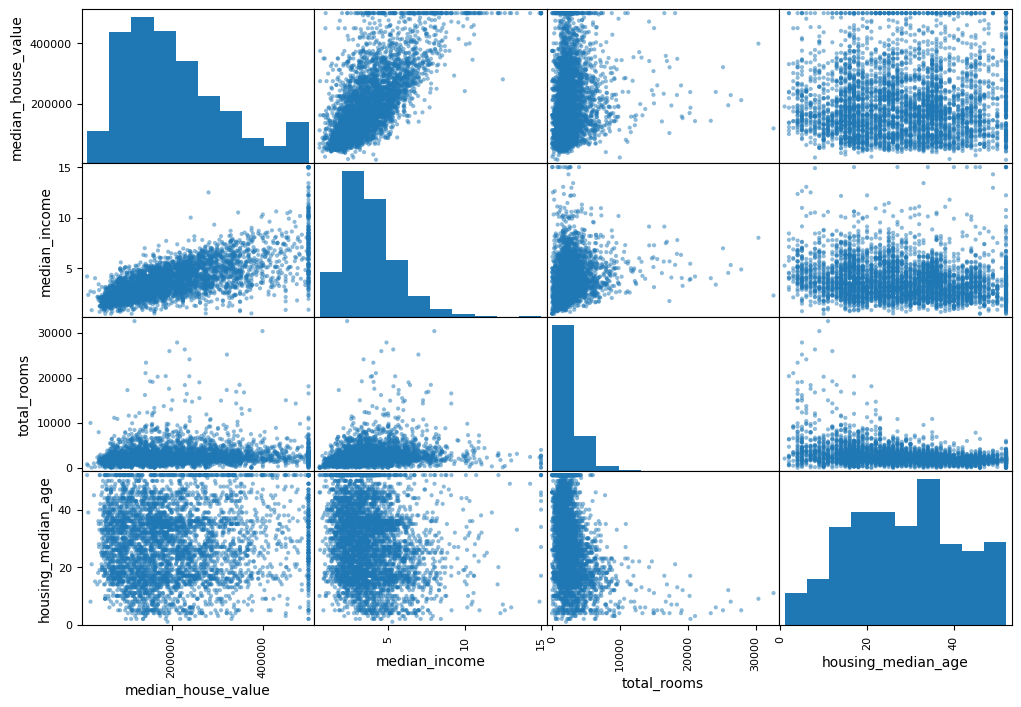

In [28]:
from pandas.plotting import scatter_matrix

attributes =["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

As you can see median house value is almost linearly related to median income.

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

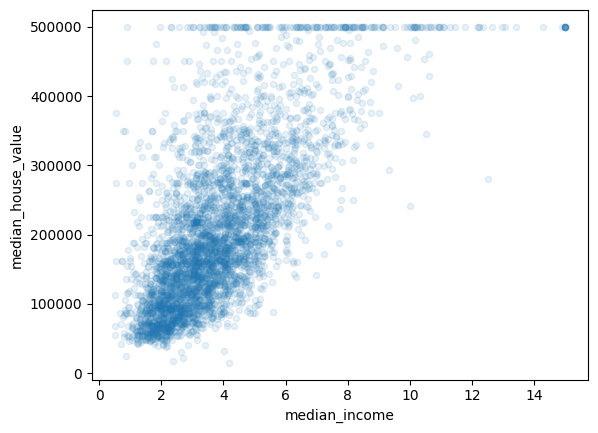

In [29]:
housing.plot.scatter(x="median_income",y="median_house_value",alpha =0.1)

> Plot between median house value  and median income shows that there is linear relation between both but near 500K there is price cap.

### Experimenting with attribute combinations

In [30]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [31]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

> Compared to total bedrooms new bedrooms per room is more correlated to median house value.

In [32]:
housing = strat_train_set.drop("median_house_value",axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [33]:
# total bedroom attribute has some missing values

# housing.dropna(subset =["total_bedrooms"])
# housing.drop("total_bedrooms",axis=1)
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median,inplace=True)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")

In [35]:
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
X = imputer.transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

handiling text and categorical attributes

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [41]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


> one hot encoding, because ML algorithm will assume 0 and 1 are similar compared to 0 and 4. 

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [44]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room =X[:,population_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


### Feature Scaling

> Machine Learning Algorithms don't perform well when the input numerical data have very different scale. Min-Max scaling and standardization are two common ways to get all attributes have same scale.   

In [46]:
# pipeline constructor takes a list of name/estimator pairs defining a squence of steps.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy ="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [47]:
from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values


In [48]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('one_hot_encoder', OneHotEncoder(sparse=False))
])

In [49]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline)
])

In [50]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [51]:
housing_prepared.shape

(16512, 16)

### Model Training

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [53]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:",lin_reg.predict(some_data_prepared))

Predictions: [ 88333.09379412 304123.62735521 154187.05347464 183840.76954194
 247421.15200237]


In [54]:
print("Labels:",list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [55]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rme = np.sqrt(lin_mse)
lin_rme

68898.1375370648

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [57]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

> This can't be the case. Maybe the model overfit. So let's use set of training data for validation set.

### Using Cross-Validation

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print("scores:",scores)
    print("Mean:",scores.mean())
    print("standard deviation:",scores.std())

In [60]:
display_scores(tree_rmse_scores)

scores: [71122.72246881 67393.45805447 66307.26966433 68728.55161568
 64877.61080997 74836.78970242 68584.68852169 71428.95405875
 68639.62111783 70322.93188083]
Mean: 69224.2597894771
standard deviation: 2700.4261490460153


In [61]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,
                            scoring ="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores: [72388.64937198 64547.9887793  68170.84810636 69123.05064823
 66882.20628954 73022.80595635 70535.54365056 69461.22422101
 66950.1167962  70520.49977901]
Mean: 69160.29335985384
standard deviation: 2479.9520955571693


In [62]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [63]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18433.292482966204

In [64]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,
                            scoring ="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [50851.70788893 48751.73737768 46004.29822222 50479.08416508
 47524.89170695 51374.37715997 51056.226396   49283.82260288
 47755.62926528 53700.19784288]
Mean: 49678.19726278841
standard deviation: 2140.4535079046686


### Fine tuning the model

In [65]:
# grid search

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap': [False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                            scoring ='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [66]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [67]:
grid_search.best_estimator_
RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=None,
                    max_features=6,max_leaf_nodes=None, 
                    min_samples_leaf=1,min_samples_split=2,
                    min_weight_fraction_leaf=0.0,n_estimators=30,n_jobs=1,
                    oob_score=False,random_state=40,verbose=0,warm_start=False)

RandomForestRegressor(criterion='mse', max_features=6, n_estimators=30,
                      n_jobs=1, random_state=40)

In [68]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63578.4912416432 {'max_features': 2, 'n_estimators': 3}
55159.58606483036 {'max_features': 2, 'n_estimators': 10}
52752.75517845668 {'max_features': 2, 'n_estimators': 30}
60544.52088908776 {'max_features': 4, 'n_estimators': 3}
52931.358564880706 {'max_features': 4, 'n_estimators': 10}
50414.594848381465 {'max_features': 4, 'n_estimators': 30}
59191.82300204819 {'max_features': 6, 'n_estimators': 3}
51850.893947542194 {'max_features': 6, 'n_estimators': 10}
50047.70153148803 {'max_features': 6, 'n_estimators': 30}
59201.129771344575 {'max_features': 8, 'n_estimators': 3}
52043.74599109274 {'max_features': 8, 'n_estimators': 10}
49982.411450100335 {'max_features': 8, 'n_estimators': 30}
62332.94479602874 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54685.851667136594 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59547.995913708495 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52786.89101583313 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.22864339e-02, 6.58296751e-02, 3.96315442e-02, 1.50020953e-02,
       1.52171269e-02, 1.46457641e-02, 1.44126307e-02, 3.67960856e-01,
       4.26534538e-02, 7.49863291e-02, 1.01125218e-01, 5.81414245e-03,
       1.65590231e-01, 7.84921387e-05, 1.92535780e-03, 2.84064921e-03])

In [70]:
extra_attribs =["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3679608562274144, 'median_income'),
 (0.16559023066564296, 'INLAND'),
 (0.10112521844832241, 'bedrooms_per_room'),
 (0.07498632909301108, 'pop_per_hhold'),
 (0.07228643386902765, 'longitude'),
 (0.06582967514633381, 'latitude'),
 (0.0426534538069127, 'rooms_per_hhold'),
 (0.03963154418446749, 'housing_median_age'),
 (0.01521712689627921, 'total_bedrooms'),
 (0.015002095282066395, 'total_rooms'),
 (0.0146457640702096, 'population'),
 (0.014412630705393321, 'households'),
 (0.005814142449919091, '<1H OCEAN'),
 (0.002840649214531731, 'NEAR OCEAN'),
 (0.0019253578018162776, 'NEAR BAY'),
 (7.849213865196791e-05, 'ISLAND')]

In [71]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [72]:
final_rmse

47903.51714215963

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b31863d5-6788-4242-96dd-8d059d1c54a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>